# Simple Linear Regression Q2

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model. 

2) Salary_hike -> Build a prediction model for Salary_hike

use salary_data.csv

### Steps :

1. Import new data set:
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
    - check for linearity and relationship between the 'x' and 'y'.
2. Correlation analysis
    - check corr()
    - check distribution of x and y.
3. Fitting a Linear Regression Model
    - train the model => fit()
    - check model summary.
    - check Rsqr and AIC values. 
4. Perform necessary Outliner detection and elimination functions if required. 
5. Predict for new data points. 



### Import new dataset

In [14]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/Admin/Documents/Assignments/Assignment 4/4Q2\salary_data.csv")
data.rename(columns={'YearsExperience':'years_exp','Salary':'salary'}, inplace = True)

In [15]:
data.info() #There are no null values in this dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   years_exp  30 non-null     float64
 1   salary     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [16]:
data.shape

(30, 2)

In [17]:
data.describe()

,years_exp,salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [18]:
#EDA_report= pp.ProfileReport(data)
#EDA_report.to_file(output_file='report_salary.html') 
#Report reveals no null values and very high correlation between delivery time and sorting time

<AxesSubplot:xlabel='years_exp', ylabel='salary'>

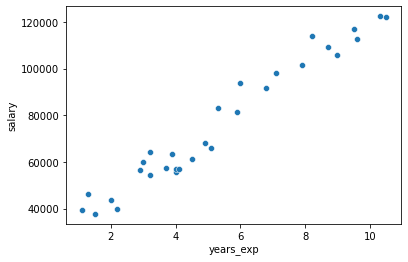

In [19]:
#View visualisations for both x and y
sns.scatterplot(x=data["years_exp"],y=data["salary"]) #Almost Linear Relationship

<function matplotlib.pyplot.show(close=None, block=None)>

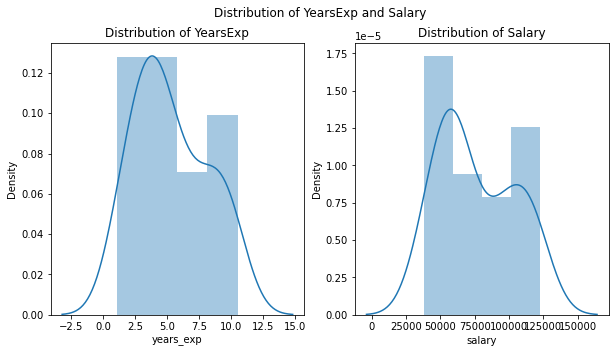

In [20]:
#DistPlot
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Distribution of YearsExp and Salary')

#Sorting Time
sns.distplot(data['years_exp'],ax=axes[0])
axes[0].set_title('Distribution of YearsExp')

#Delivery Time
sns.distplot(data['salary'],ax=axes[1])
axes[1].set_title('Distribution of Salary')

plt.show #Somewhat of a normal distribution

### Correlation Analysis

In [21]:
data.corr() # Very High correlation between Years of Experience and Salary

,years_exp,salary
years_exp,1.000000,0.978242
salary,0.978242,1.000000


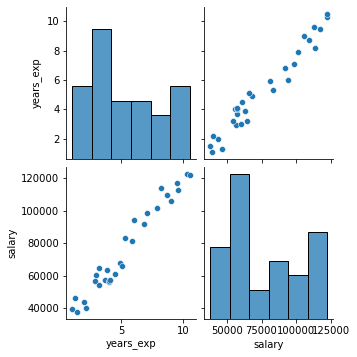

In [22]:
sns.pairplot(data) #There isa near perfect linear relation.

<AxesSubplot:xlabel='years_exp', ylabel='salary'>

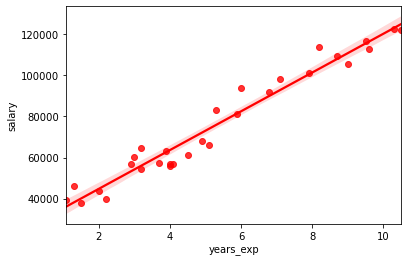

In [23]:
sns.regplot(x="years_exp", y="salary", data=data, color='r') #Great Linear relationship is clearly visible

### Fitting a Linear Regression Model

#### Using Skit-Learn Linear Regression

In [24]:
y = data['salary']
X = [[x] for x in data['years_exp']]
X #For Skitlearn Library, data needs to be in this format to work.

[[1.1],
 [1.3],
 [1.5],
 [2.0],
 [2.2],
 [2.9],
 [3.0],
 [3.2],
 [3.2],
 [3.7],
 [3.9],
 [4.0],
 [4.0],
 [4.1],
 [4.5],
 [4.9],
 [5.1],
 [5.3],
 [5.9],
 [6.0],
 [6.8],
 [7.1],
 [7.9],
 [8.2],
 [8.7],
 [9.0],
 [9.5],
 [9.6],
 [10.3],
 [10.5]]

In [25]:
model1 = LinearRegression() 
model1.fit(X,y)

LinearRegression()

In [26]:
model1.score(X, y) #R-Sqr Value is excellent. The model should be near perfect

0.9569566641435086

In [27]:
model1.intercept_ #B0 value

25792.20019866871

In [28]:
test_sort = np.array([[6.5]])
model1.predict(test_sort) #Predicting salary for years of exp = 6.5

array([87216.95528813])

#### Using statsmodels library

In [29]:
import statsmodels.formula.api as smf
model2 = smf.ols("salary~years_exp",data = data).fit()

In [30]:
model2.summary() 
#R-Sqr value is very good.
#p-values reveal that delivery time and sorting time are very dependent. Default alternate hypothesis is accepted

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        17:07:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_exp   9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Coefficients
model2.params

Intercept    25792.200199
years_exp     9449.962321
dtype: float64

In [32]:
#t and p-Values
print(model2.tvalues) 

Intercept    11.346940
years_exp    24.950094
dtype: float64


In [33]:
print(model2.pvalues)  

Intercept    5.511950e-12
years_exp    1.143068e-20
dtype: float64


In [34]:
#R squared values
(model2.rsquared,model2.rsquared_adj) #Very good values

(0.9569566641435086, 0.9554194021486339)

In [35]:
test_sort1 = pd.Series([3.5,7.5])
data_pred=pd.DataFrame(test_sort1,columns=['years_exp'])
model2.predict(data_pred)

0    58867.068324
1    96666.917610
dtype: float64

### Result

The model has been created for predicting salary from the years of experience. The R-values are excellent for this model(about 95%). This model can predict salaries very accurately.